In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, auc, roc_auc_score, average_precision_score
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler

In [2]:
outputs_df = pd.read_parquet("../data/processed/outputs_openai_embeddings_v1.parquet")

X_labels = outputs_df.columns[outputs_df.columns.str.contains("openai_embedding_large")]
y_label = "primary_better"

X_train = outputs_df[X_labels][~outputs_df.test_set].to_numpy()
y_train = outputs_df[y_label][~outputs_df.test_set].to_numpy()

X_test = outputs_df[X_labels][outputs_df.test_set].to_numpy()
y_test = outputs_df[y_label][outputs_df.test_set].to_numpy()


In [3]:
outputs_df[~outputs_df.test_set].primary_better.value_counts()

primary_better
BL    26
BP    20
BN    14
BE    13
Name: count, dtype: int64

In [4]:
smote = RandomOverSampler(random_state=42)
X_train_oversampled, y_test_oversampled = smote.fit_resample(X_train, y_train)

In [5]:
random_forest = RandomForestClassifier(random_state=99)
random_forest.fit(X_train_oversampled, y_test_oversampled)
random_forest.score(X_test, y_test)

y_pred = random_forest.predict(X_test)

In [6]:
y_pred_proba = random_forest.predict_proba(X_test)
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=random_forest.classes_)

In [14]:
labels=outputs_df[y_label].sort_values().unique()

cm = confusion_matrix(y_test, y_pred, labels=labels)

fig = px.imshow(cm, x=labels, y=labels)
fig

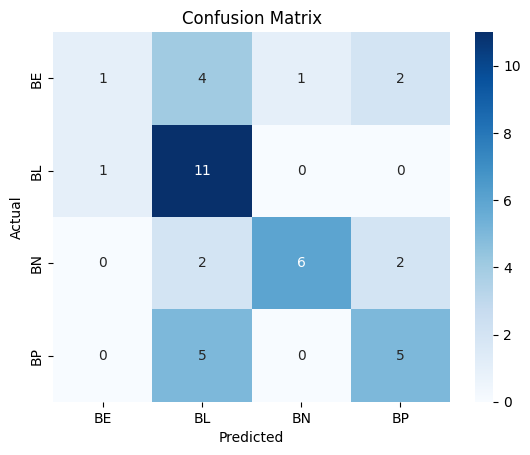

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix using seaborn
sns.heatmap(confusion_matrix.astype("category"), annot=True, cmap='Blues')

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

,0,1,2,3
0,1,4,1,2
1,1,11,0,0
2,0,2,6,2
3,0,5,0,5


In [30]:
for pred_class in random_forest.classes_:    
    print(ppa)
    y_test_ppa = (outputs_df[outputs_df["test_set"]][y_label] == pred_class).astype(int)
    print(roc_auc_score(y_test_ppa, y_pred_proba_df[pred_class]))
    print(average_precision_score(y_test_ppa, y_pred_proba_df[ppa]))

BP
0.787109375
0.5200892857142857
BP
0.8601190476190477
0.8035714285714287
BP
0.9083333333333333
0.7769551282051282
BP
0.9500000000000001
0.859469696969697


In [77]:
client = OpenAI()

def get_embedding(text: str, model="text-embedding-3-small"):
   return client.embeddings.create(input = [text], model=model).data[0].embedding

,Sub-Region,OFICINA,Location,Better,Primary PPA,Region,Output Statement,Deliverables/Milestones,#&nbsp;Dlv/MS,Regional Initiative,...,openai_embedding_large_3063,openai_embedding_large_3064,openai_embedding_large_3065,openai_embedding_large_3066,openai_embedding_large_3067,openai_embedding_large_3068,openai_embedding_large_3069,openai_embedding_large_3070,openai_embedding_large_3071,test_set
2,SA,COUNTRY,Bolivia,4 - Better Life,BL.3 - Agriculture and Food Emergencies,RLC - Latin America and the Caribbean Region,Productores y productoras vulnerables al cambi...,* 8319 - Organizaciones de productoras y produ...,4,"RIL4 - Reduction of inequalities, poverty and ...",...,-0.010747,0.009892,0.006297,0.023807,0.035536,-0.006297,-0.002354,-0.009563,-0.025166,True
4,SA,COUNTRY,Brazil,3 - Better Environment,BE.3 - Biodiversity and Ecosystem Services for...,RLC - Latin America and the Caribbean Region,"Federal, state and municipal governments and o...",* 7373 - Contribute to strengthening the Natio...,3,RIL3 - Sustainable management of natural resou...,...,-0.004566,0.018123,0.001161,0.001170,-0.007138,0.000892,-0.003194,-0.012811,-0.012867,True
5,SA,COUNTRY,Brazil,4 - Better Life,BL.2 - Inclusive Rural Transformation,RLC - Latin America and the Caribbean Region,"Federal, state and municipal governments, civi...",* 7354 - UTF project document elaborated and a...,5,"RIL4 - Reduction of inequalities, poverty and ...",...,-0.004263,0.029554,-0.012861,0.008776,-0.004193,-0.015663,0.001935,-0.015293,-0.021769,True
9,SA,COUNTRY,Colombia,2 - Better Nutrition,BN.1 - Healthy Diets for All,RLC - Latin America and the Caribbean Region,Capacidades en comunidades y actores relevante...,None,0,RIL2 - End hunger and achieve food security an...,...,-0.013599,0.011181,-0.002505,0.020242,0.007383,-0.011058,0.002805,-0.031058,-0.046856,True
10,SA,COUNTRY,Colombia,2 - Better Nutrition,BN.5 - Transparent Markets and Trade,RLC - Latin America and the Caribbean Region,Capacidades del Estado para proveer que reduzc...,None,0,RIL2 - End hunger and achieve food security an...,...,0.002331,0.002435,-0.010715,-0.010697,0.023726,-0.009433,0.009703,-0.027028,-0.022597,True
12,SA,COUNTRY,Colombia,4 - Better Life,BL.1 - Gender Equality and Rural Women's Empow...,RLC - Latin America and the Caribbean Region,Capacidades de sociedad civil y especialmente ...,None,0,"RIL4 - Reduction of inequalities, poverty and ...",...,0.001822,0.006952,0.006287,0.019884,0.035530,-0.021368,-0.010595,-0.027572,-0.018554,True
18,SA,COUNTRY,"Ecuador (EC, FLECU)",2 - Better Nutrition,BN.2 - Nutrition for the Most Vulnerable,RLC - Latin America and the Caribbean Region,MPP Output 1.1 Leyes;políticas;estrategias y o...,* 7147 - Los Gobiernos Autónomos Descentraliza...,3,RIL2 - End hunger and achieve food security an...,...,-0.015400,-0.001830,-0.015412,0.020928,0.016962,-0.012233,-0.017242,-0.012123,-0.029067,True
21,SA,COUNTRY,"Ecuador (EC, FLECU)",4 - Better Life,BL.5 - Hand-in-Hand (HiH) Initiative,RLC - Latin America and the Caribbean Region,MPP Output 2.5 Herramientas para la planificac...,* 7550 - El Ministerio de Agricultura y Ganade...,1,"RIL4 - Reduction of inequalities, poverty and ...",...,-0.023667,0.012856,-0.007506,0.002067,0.035784,-0.013607,0.007487,-0.018098,-0.008407,True
23,SA,COUNTRY,"Peru (PE, FLPER)",3 - Better Environment,BE.4 - Achieving Sustainable Urban Food Systems,RLC - Latin America and the Caribbean Region,"Las partes interesadas (comerciantes, distribu...","* 7031 - PRODUCE y PNDP, con asistencia técnic...",3,RIL3 - Sustainable management of natural resou...,...,-0.004315,0.004675,0.008035,0.012679,0.026184,-0.012216,-0.010245,-0.007942,-0.011102,True
30,RLC,OR RLC,RLC - RLC Region,1 - Better Production,BP.3 - One Health,RLC - Latin America and the Caribbean Region,Los países de la región mejoran sus capacidade...,* 9235 - 2. Mecanismos y capacidades fortaleci...,3,"RIL1 - Efficient, inclusive and sustainable pr...",...,-0.005652,-0.001714,0.019148,-0.012910,0.02

In [57]:
precision_score(y_test, y_pred, average="weighted"), recall_score(y_test, y_pred, average="weighted")

/Users/jm/Code/fao-ppa-classifier/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



(0.37833333333333335, 0.425)

In [60]:
roc_auc_score(y_test, y_pred)

ValueError: could not convert string to float: 'BE.1'

# Small embeddings

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=confusion_matrix.values,
                               x=confusion_matrix.columns,
                               y=confusion_matrix.index,
                               colorscale='Blues',
                               reversescale=True))

fig.update_layout(title='Confusion Matrix',
                  xaxis_title='Predicted',
                  yaxis_title='Actual')

fig.show()
# Plot the confusion matrix using seaborn
# sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

# # Set the title and labels
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # Show the plot
# plt.show()

In [6]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.
